In [1]:
import pandas as pd
import numpy as np

from glob import glob

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Node membership clustergram

In [10]:
networks_dir = "/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171004/randomizations_full/"

files = glob(networks_dir+"*/*nodes.tsv")

files

['/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171004/randomizations_full/w_0.25_b_0.25_g_0/w_0.25_b_0.25_g_0.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171004/randomizations_full/w_0.25_b_0.25_g_10/w_0.25_b_0.25_g_10.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171004/randomizations_full/w_0.25_b_0.25_g_100/w_0.25_b_0.25_g_100.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171004/randomizations_full/w_0.25_b_0.25_g_1000/w_0.25_b_0.25_g_1000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171004/randomizations_full/w_0.25_b_0.25_g_10000/w_0.25_b_0.25_g_10000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_CTR_20171004/randomizations_full/w_0.25_b_0.25_g_100000/w_0.25_b_0.25_g_100000.nodes.tsv',
 '/Users/jonathanli/Documents/research/ALS/network_analysis/iMNs_ALS_C

In [11]:
dfs = []
mapper = {"steiner": 1, "TF": 2, "terminal": 3}

for file in files: 
    tag = file.split('/')[-1].rstrip(".nodes.tsv")
    
    df = pd.read_csv(file, sep='\t')
    df[tag] = df["type"].apply(lambda x: mapper[x])
    df = df[["protein", tag]].set_index("protein")
    
    dfs.append(df)
    
merged = pd.concat(dfs, axis=1).fillna(0)

/Users/jonathanli/anaconda/envs/py3k/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


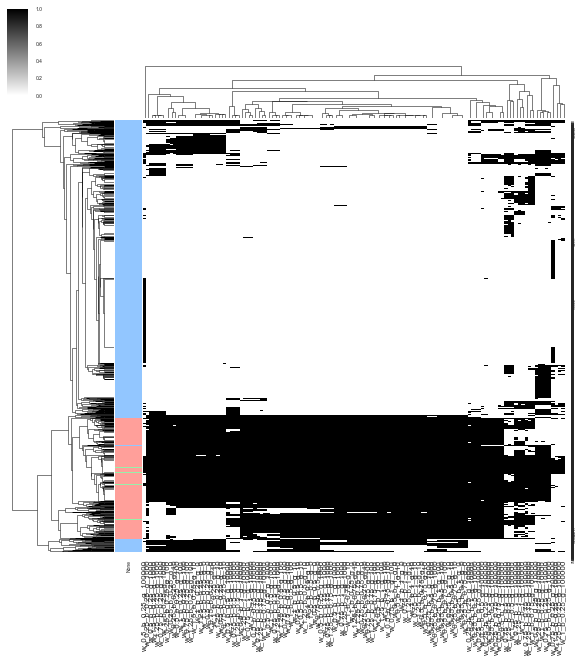

In [12]:
sns.set(font_scale=0.5)

# steiner: blue, TF: green, terminal: red
palette = sns.color_palette("pastel")
row_colors = merged.max(axis=1).map({i:palette[i-1] for i in range(len(palette))})

cm = sns.clustermap(merged>0, row_colors=row_colors, cmap=sns.cubehelix_palette(dark=0, light=1, hue=0, as_cmap=True))

hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=3)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width, col.height*0.5])

cm.savefig(networks_dir+'/../param_node_membership.pdf')